# Исследование закономерностей, определяющих успешность игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это исследование позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели исследования:**
1. Выявить интересные особенности и зависимости которые существуют на рынке видеоигр.
2. Определить, какие метрики имеют наибольшее влияние на успешность игр.
**Таким образом, моё исследование пройдет в 10 этапов:**
- Обзор данных.
- Предобработка данных.
- Расчёт и добавление результатов в таблицу.
- Подсчет количества игр за разные годы.
- Анализ изменения продаж по платформам.
- Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.
- Выявление самых прибыльных жанров.
- Составление портрета пользователя каждого региона.
- Проверка гипотез. 
- Общий вывод.

### Обзор данных. 

Импортируем нужные для исследования библиотеки и отключим "предупреждение запутанных назначений"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Предобработка данных. 

Приведем названия столбцов к нижнему регистру.

In [3]:
data = (
    data.rename(columns={'Name':'name',
                        'Platform':'platform',
                        'Year_of_Release':'year_of_release',
                        'Genre':'genre',
                        'NA_sales':'na_sales',
                        'EU_sales':'eu_sales',
                        'JP_sales':'jp_sales',
                        'Other_sales':'other_sales',
                        'Critic_Score':'critic_score',
                        'User_Score':'user_score',
                        "Rating":'rating'})
)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Преобразуем данные в нужные типы.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Был изменен тип данных в следующих столбцах:
- Year of release (float64 -> Int64), так как год это целое число.
- Critic score (float64 -> Int64), так как средняя оценка критиков это целое число от 0 до 100.
- User score (object -> float64), так как средняя оценка пользователей это число с плавующей запятой от 0 до 10.

Обработаем пропуски в таблице.

In [6]:
pd.DataFrame(round(data.isna().mean() * 100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [7]:
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [8]:
data = data.dropna(subset=['year_of_release'])
data.head()
data['rating'] = data['rating'].fillna('tbd')
pd.DataFrame(round(data.isna().mean() * 100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [9]:
#жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'years_of_life', ascending = False)

Пропуски в столбцах year_of_release и ratings были заменены на медианные в первом случае, и на значение 'tbd' во втором.

В столбце user_score так же были обнаружены значения 'tbd', что означает "будет определено", но так как мы использовали метод to_numeric с параметром errors='coerce', то эти значения были преобразованы в nan для удобности дальнейшей работы с данными.

Пропуски же в столбцах critic_score и user_score целесообразние будет оставить в том виде, в котром они есть сейчас, так как из-за того что у нас более 50% пропусков мы не можем ни заменить их медианными значениями, ни отбросить.

Само появление такого количества пропусков, вероятно, обусловловленно или неправильной привязкой оценок дата инженерами, или большого количества инди-игр в таблице, которые агрегаторы отзывов попросту не отслеживают.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [10]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,tbd,28.31


In [11]:
data.info()
data = data.dropna(subset=['name', 'genre'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


### Исследовательский анализ данных. 

Посмотрим, сколько игр выпускалось в разные годы.

In [12]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Как видно на таблице выше, игры начали бурно выпускаться с 1995 года, более 200 штук в год, отметку в более тысячи игр в год индустрия преодолела в 2006 году, а пик выпуска видеоигр пришелся на 2008-2009 года. Такой бурный рост можно объяснить выпуском сверхуспешной приставки шестого поколения PlayStation 2 в 2000 году (продано более 150 миллионов приставок).


Проанализируем изменения продаж по платформам.

Создадим функцию pivot_platform, которая будет возвращать нам сводные таблицы по нужным нам платформам

In [13]:
def pivot_platform(platform):
    target_pivot = (
        data
        .query('platform == @platform')
        .pivot_table(index='year_of_release',
                    values='total_sales',
                     aggfunc='sum'
                    )
    )
    return target_pivot

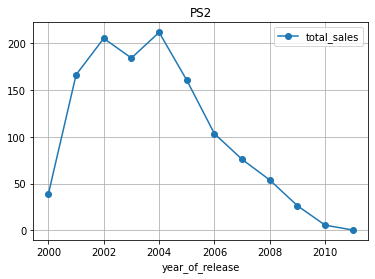

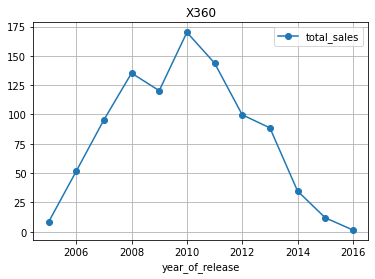

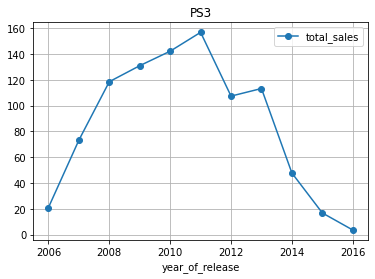

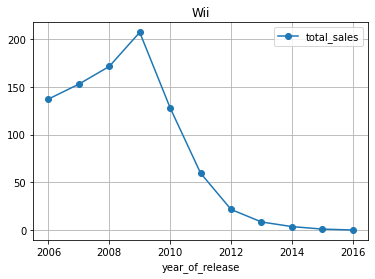

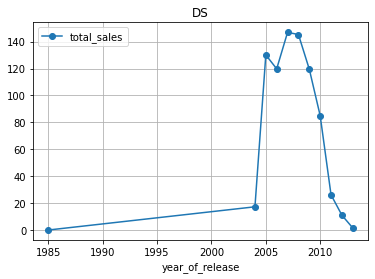

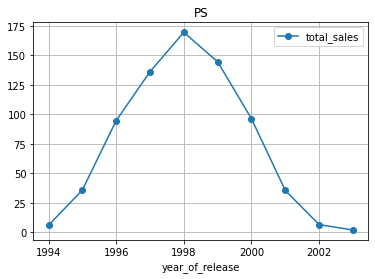

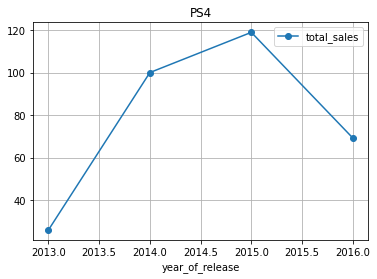

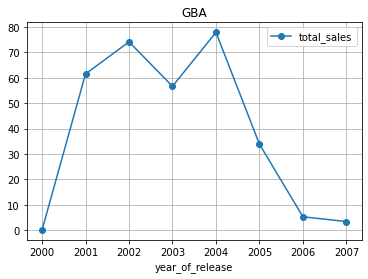

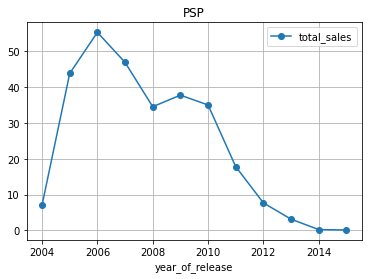

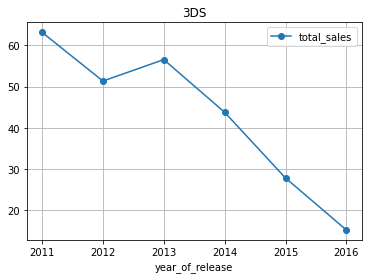

In [14]:
platforms_per_year = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)


for platform in platforms_per_year.index[:10]:
    (
        pivot_platform(platform)
        .plot(
            grid=True,
            style='o-',
        )
    )
    plt.title(platform)
    plt.show()

In [15]:
mean_years_of_life = round(years_of_life['years_of_life'].mean())
print(f'Средний срок жизни платформ составляет {mean_years_of_life} лет')

Средний срок жизни платформ составляет 8 лет


Как видно на графиках выше, не все самые успешные по продажам игр платформы актуальны на 2016 год, также следует отметить, что в среднем актуальность платформы составляет около 8 лет.

Так как геймдев - это динамично изменяющаяся индустрия, то возьмем за актуальный период последние 3 года, то есть с 2014 по 2016 годы.

In [16]:
# check
years_of_life['years_of_life']

platform
2600     9
3DO      1
3DS      5
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      6
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      5
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
Name: years_of_life, dtype: Int64

In [17]:
actual_data = data.query('year_of_release >= 2014')
actual_data.shape

(1689, 12)

Выберем потенциально прибыльные платфломы.

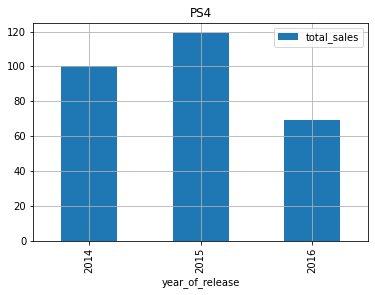

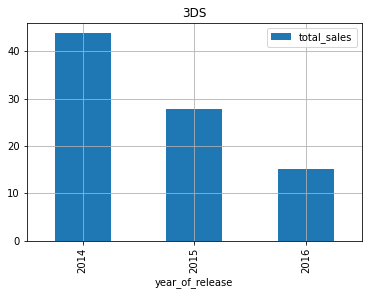

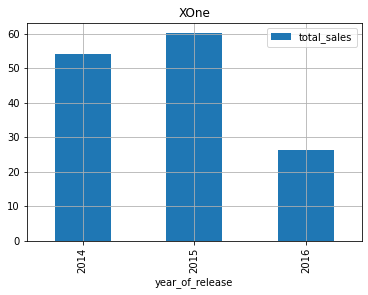

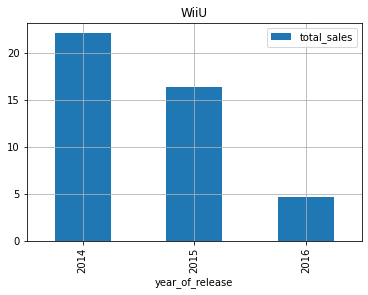

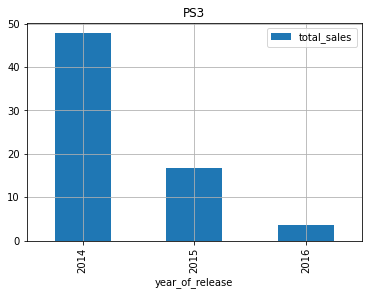

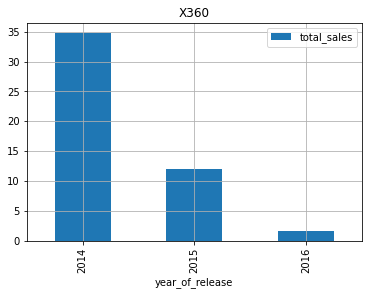

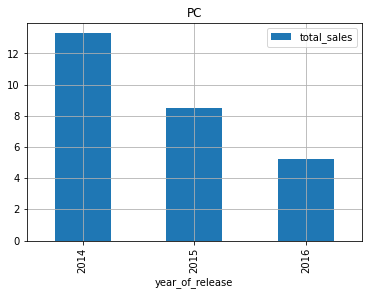

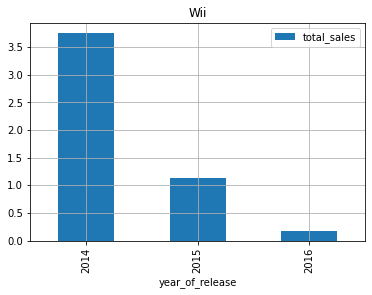

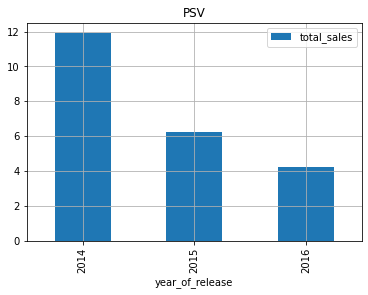

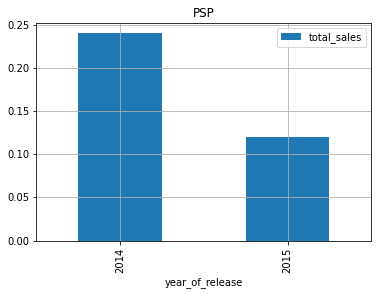

In [18]:
for platform in actual_data['platform'].unique():
    (
        actual_data
        .query('platform == @platform')
        .pivot_table(index='year_of_release',
                    values='total_sales',
                    aggfunc='sum')
        .plot(kind='bar',
            grid=True,
            style='o-',
        )
    )
    plt.title(platform)
    plt.show()

Из графиков выше можно сделать следующие выводы:

- После 2013 года, с выходом консолей 8 поколения (PS4, XOne), продажи на консолях предыдущего поколения резко пошли на спад.

- Учитывая, что данные за 2016 год неполные, консоли 8 поколения показывают рост продаж в 2015 году.

Потенциально прибыльными можно выделить платформы PS4, XOne, 3DS и PC, так как у платформ PS3 и X360 к 2016 году продажи игр упали почти до 0, ведь эти консоли считаются устаревшими, а платформа PC хоть всегда и проигрывала консолям по суммарным продажам видеоигр, но является самой распространенной платформой.

Построим "ящик с усами" для глобальных продаж в разбивке по платформам и обработаем аномальные значения.

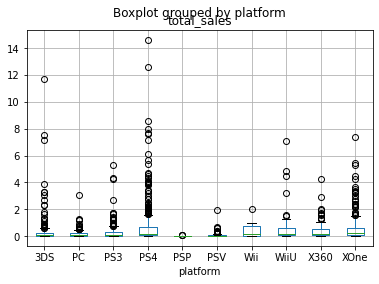

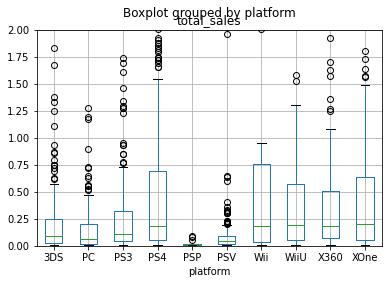

In [19]:
(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='platform'
    )
)
plt.show()

(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='platform'
    )
)
plt.ylim(0, 2)
plt.show()

Как видно из графиков, в данных присутствует немалое количество потенциальных выбросов, из-за чего статистические данные могут быть искажены.

Посмотрим, как влияют на продажи игр отзывы пользователей и критиков, на примере продаж платформ-конкурентов PS4, XBox One и PC.

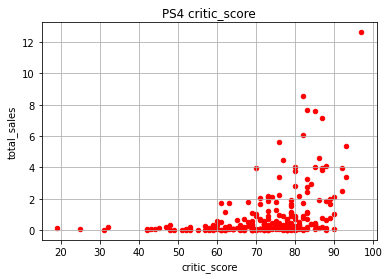

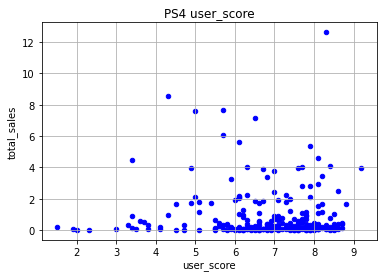

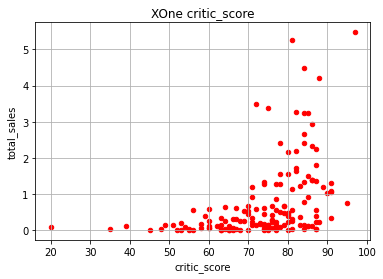

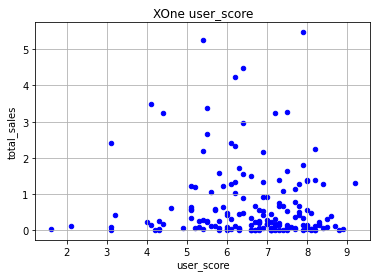

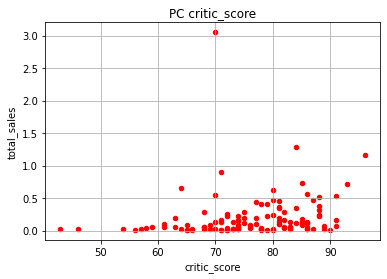

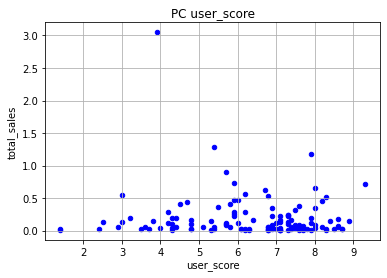

In [20]:
platforms = ['PS4', 'XOne', 'PC']
for platform in platforms:
    (
        actual_data
        .query('platform == @platform')
        .plot(x='critic_score',
             y='total_sales',
             kind='scatter',
             grid=True,
             color='red')
    )
    plt.title(platform + ' critic_score')
    plt.show()
    (
        actual_data
        .query('platform == @platform')
        .plot(x='user_score',
             y='total_sales',
             kind='scatter',
             grid=True,
             color='blue')
    )
    plt.title(platform + ' user_score')
    plt.show()

In [21]:
for platform in platforms:
    critic_score_corr = (
        actual_data
        .query('platform == @platform')
        .corr()
        ['total_sales']['critic_score']
    )
    print(f'Корреляция между оценками критиков и суммарными продажами на платформе {platform} составляет: {critic_score_corr:.2f}\n')
    
    user_score_corr = (
        actual_data
        .query('platform == @platform')
        .corr()
        ['user_score']['total_sales']
    )
    print(f'Корреляция между оценками пользователей и суммарными продажами на платформе {platform} составляет: {user_score_corr:.2f}\n')


Корреляция между оценками критиков и суммарными продажами на платформе PS4 составляет: 0.40

Корреляция между оценками пользователей и суммарными продажами на платформе PS4 составляет: -0.04

Корреляция между оценками критиков и суммарными продажами на платформе XOne составляет: 0.43

Корреляция между оценками пользователей и суммарными продажами на платформе XOne составляет: -0.07

Корреляция между оценками критиков и суммарными продажами на платформе PC составляет: 0.17

Корреляция между оценками пользователей и суммарными продажами на платформе PC составляет: -0.07



Как видно по выводу выше, оценки критиков имеют умеренную положительную корреляцию с суммарными продажами на платформах PS4 и XOne (коэффициент корреляции Пирсона равен 0.4 и 0.43 соответственно), в то время как оценки пользователей практически не влияют на суммарные продажи (коэффициент корреляции Пирсона -0.04 и -0.07 соответственно). 

В то же время, оценки критиков на платформе PC имеют куда меньшую положительную корреляцию (коэффициент корреляции Пирсона равен 0.17), однако оценки пользователей все так же не влияют на суммарные продажи (коэффициент корреляции Пирсона -0.07).

Такое низкое влияние оценки пользователей, вероятно, связанно с тем, что маркетологи больших геймдев студий научились работать с "рейдами ненависти" от пользователей, примером может послужить игра The Last of Us 2: имея пользовательский рейтинг 3.3 и рейтинг критиков 95, игра все равно разошлась тиражом в более чем 10 миллионов копий и стала самым продаваемым эксклюзивом для PS4.

Посмотрим на общее распределение игр по жанрам.

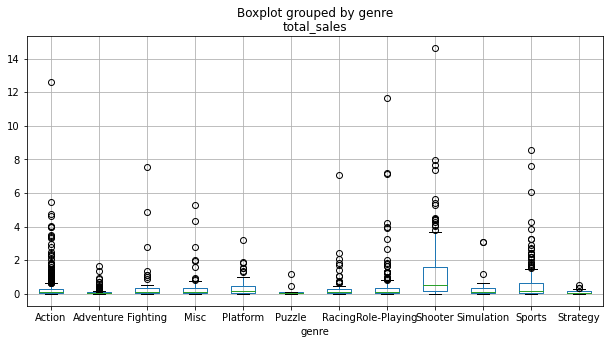

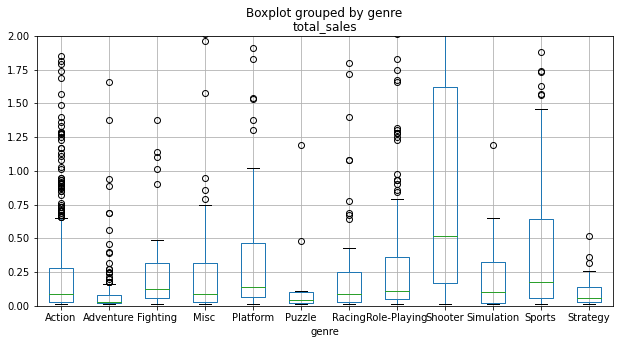

In [22]:
(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='genre',
        figsize=(10, 5)
    )
)
plt.show()

(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='genre',
        figsize=(10, 5)
    )
)
plt.ylim(0, 2)
plt.show()

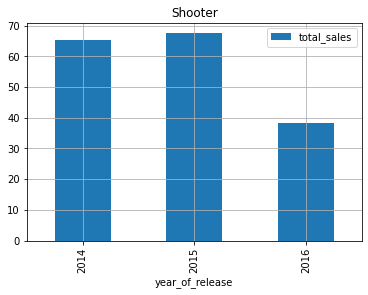

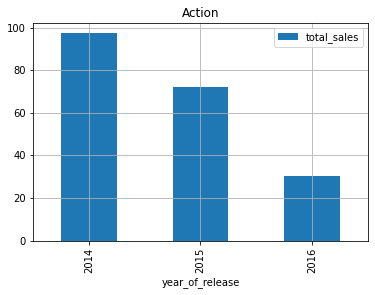

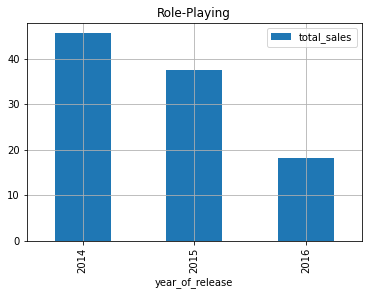

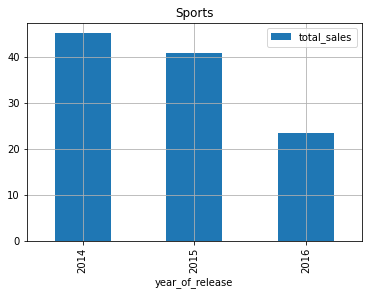

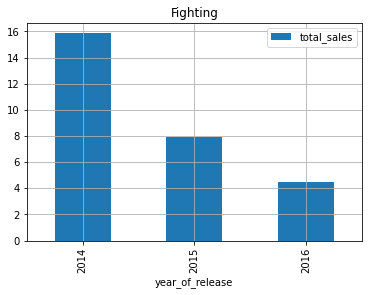

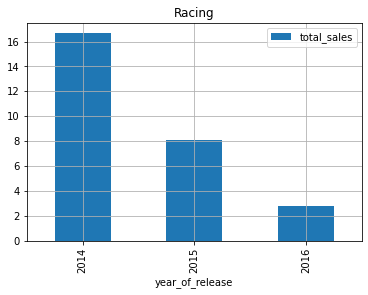

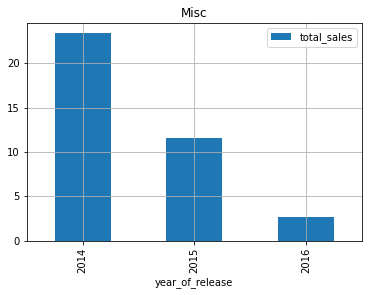

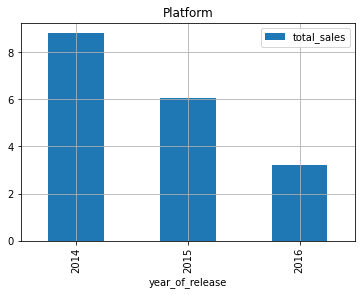

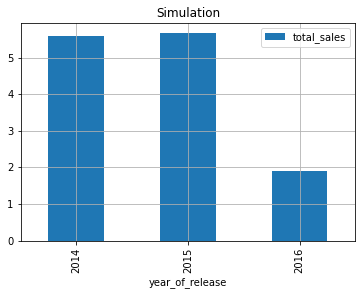

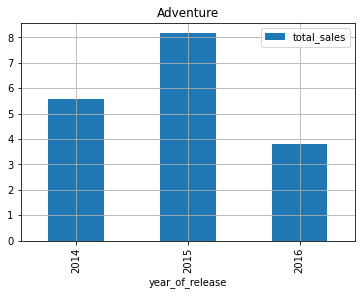

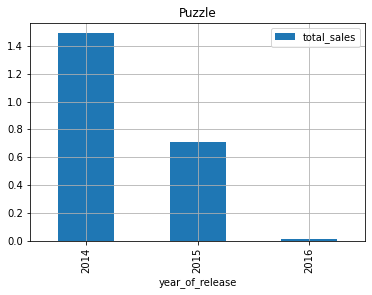

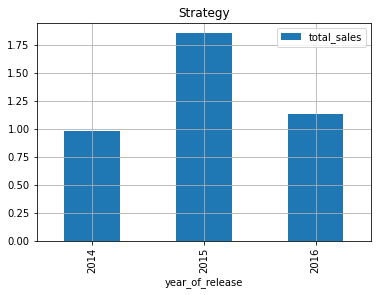

In [23]:
for genre in actual_data['genre'].unique():
    (
        actual_data
        .query('genre == @genre')
        .pivot_table(index='year_of_release',
                    values='total_sales',
                    aggfunc='sum')
        .plot(kind='bar',
             grid=True)
    )
    plt.title(genre)
    plt.show()

Как видно из диаграммы размаха, наиболее стабильно продающиеся жанры - Shooter (медиана продаж более 500 тысяч копий), Sports (медиана продаж более 150 тысяч копий), Platform(медиана продаж более 125 тысяч копий).

Cамые продаваемые жанры за актуальный период - это Action, Shooter, Sports и RolePlay, из них Action, Sports и Role-Play имеют отрицательную тенденцию роста суммарных продаж в последние годы.

Также следует обратить внимание на растущие суммарные продажи таких жанров, как Strategy (+75% в 2015 году) и Adventure (+40% в 2015 году).

Остальные же жанры имеют низкие суммарное и медианное значения продаж, также выделяется жанр Puzzle с самыми низкими продажами среди всех жанров.

### Портрет пользователя каждого региона. 

#### Самые популярные платформы.

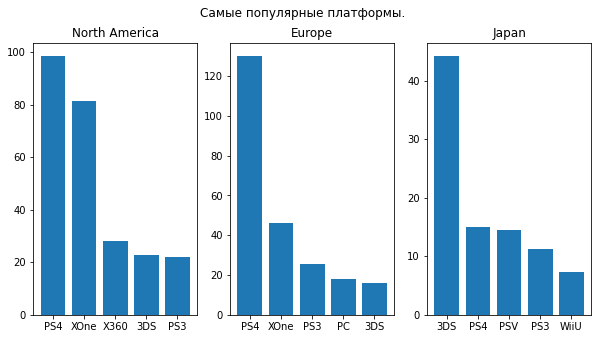

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
na_platforms = (
    actual_data
    .pivot_table(index='platform',
                values='na_sales',
                aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)[:5]
)
eu_platforms = (
    actual_data
    .pivot_table(index='platform',
                values='eu_sales',
                aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)[:5]
)
jp_platforms = (
    actual_data
    .pivot_table(index='platform',
                values='jp_sales',
                aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)[:5]
)
ax1.bar(na_platforms.index, na_platforms['na_sales'])
ax1.set_title('North America')
ax2.bar(eu_platforms.index, eu_platforms['eu_sales'])
ax2.set_title('Europe')
ax3.bar(jp_platforms.index, jp_platforms['jp_sales'])
ax3.set_title('Japan')
fig.suptitle('Самые популярные платформы.')
plt.show()

**Самые популярные платформы в североамериканском регионе:**
- PS4
- XOne
- X360
- 3DS
- PS3

**Самые популярные платформы в европеском регионе:**
- PS4
- XOne
- PS3
- PC
- 3DS

**Самые популярные платформы в японском регионе:**
- 3DS
- PS4
- PSV
- PS3
- WiiU

#### Самые популярные жанры.

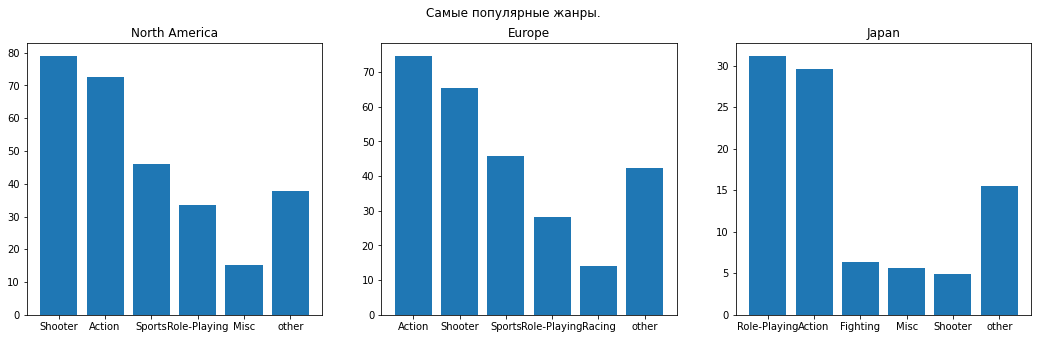

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
na_platforms = (
    actual_data
    .pivot_table(index='genre',
                values='na_sales',
                aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_other = pd.DataFrame([na_platforms['na_sales'][5:].sum()], columns=['na_sales'], index=['other'])
na_platforms = na_platforms[:5].append(na_other)

eu_platforms = (
    actual_data
    .pivot_table(index='genre',
                values='eu_sales',
                aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
eu_other = pd.DataFrame([eu_platforms['eu_sales'][5:].sum()], columns=['eu_sales'], index=['other'])
eu_platforms = eu_platforms[:5].append(eu_other)

jp_platforms = (
    actual_data
    .pivot_table(index='genre',
                values='jp_sales',
                aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_other = pd.DataFrame([jp_platforms['jp_sales'][5:].sum()], columns=['jp_sales'], index=['other'])
jp_platforms = jp_platforms[:5].append(jp_other)

ax1.bar(na_platforms.index, na_platforms['na_sales'])
ax1.set_title('North America')
ax2.bar(eu_platforms.index, eu_platforms['eu_sales'])
ax2.set_title('Europe')
ax3.bar(jp_platforms.index, jp_platforms['jp_sales'])
ax3.set_title('Japan')
fig.suptitle('Самые популярные жанры.')
plt.show()

**Самые популярные жарны в североамериканском регионе:**
- Shooter
- Action
- Sports
- Role-Playing
- Misc

**Самые популярные жанры в европейском регионе:**
- Action
- Shooter
- Sports
- Role-Playing
- Racing

**Самые популярные жарны в японском регионе:**
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

#### Влвияние ESRB на продажи в регионе.

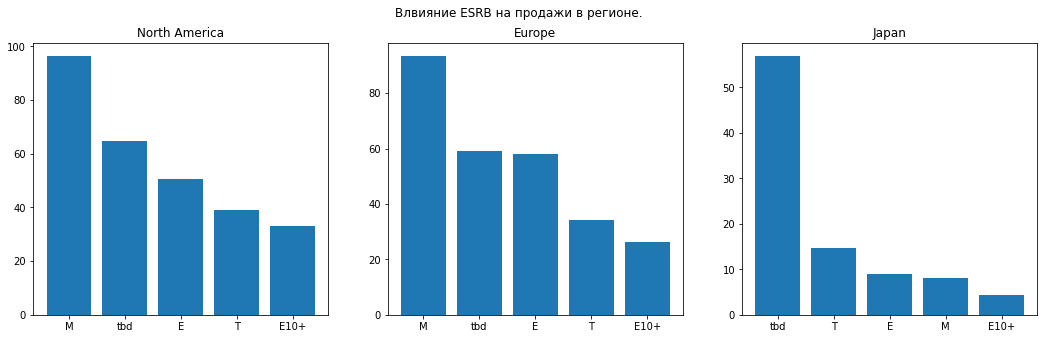

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
na_platforms = (
    actual_data
    .pivot_table(index='rating',
                values='na_sales',
                aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    [:5]
)

eu_platforms = (
    actual_data
    .pivot_table(index='rating',
                values='eu_sales',
                aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    [:5]
)

jp_platforms = (
    actual_data
    .pivot_table(index='rating',
                values='jp_sales',
                aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    [:5]
)

ax1.bar(na_platforms.index, na_platforms['na_sales'])
ax1.set_title('North America')
ax2.bar(eu_platforms.index, eu_platforms['eu_sales'])
ax2.set_title('Europe')
ax3.bar(jp_platforms.index, jp_platforms['jp_sales'])
ax3.set_title('Japan')
fig.suptitle('Влвияние ESRB на продажи в регионе.')
plt.show()

**Североамериканский регион:**

В североамериканском регионе лучше всего продаются игры с рейтингами:
- "M" (для лиц старше 17 лет)
- "T" (для лиц старше 13 лет) 
- "E" (для всех возрастов)

Также в топ-2 попал 'неустановленный рейтинг', что возможно связано неправильной подвязкой рейтинга к данным.

Можно отметить, что чем строже рейтинг получает игра, тем больше пользователи данного региона испытывают к ней интерес.

**Европейский регион:**

В европейском регионе лучше всего продаются игры с рейтингами:
- "M"(для лиц старше 17 лет)
- "E"(для всех возрастов)
- "T"(для лиц старше 13 лет) 

Все так же в топ-2 попал 'неустановленный рейтинг', что возможно связано неправильной подвязкой рейтинга к данным.

Так же как и в североамериканском регионе, европейские пользователи отдают предпочтение играм с более жестоким рейтингом ESRB.

**Японский регион:**

В отличии от предыдущих регионов, в японском регионе самые продаваемые игры имеют рейтинг "tbd", то есть он не определен. Однако сразу за ним следуют все те же "T", "E" и "M".

Это, вероятнее всего, связанно с тем, что в японском регионе, в основном, рейтинги компьютерным играм присуждает не ESRB, а японская организация CERO, потому у большого числа игр по рейтинговой системе ESRB стоит неопределенный рейтинг.

### Проверка гипотез.

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки гипотизы о равенстве средних двух генеральных совокупностей по взятым из них выборкам испольуем ttest_ind.

```
H_0: Средние пользовательские рейтинги (user_score) платформы Xbox One = средние пользовательские 
рейтинги (user_score) платформы PC`
H_1: Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ средние пользовательские 
рейтинги (user_score) платформы PC`
alpha = 0.05
```

In [27]:
results = (
    st
    .ttest_ind(actual_data[actual_data['platform'] == 'XOne']['user_score'],
              actual_data[actual_data['platform'] == 'PC']['user_score'],
              equal_var=False,
              nan_policy='omit')
)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    

0.11601398086668943
Не удалось отвергнуть нулевую гипотезу


#### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотизы о равенстве средних двух генеральных совокупностей по взятым из них выборкам испольуем ttest_ind.

```
H_0: Средние пользовательские рейтинги (user_score) жанра Action = средние пользовательские 
рейтинги (user_score) платформы PC`
H_1: Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ средние пользовательские 
рейтинги (user_score) платформы PC`
alpha = 0.05
```

In [29]:
results = (
    st
    .ttest_ind(actual_data[actual_data['genre'] == 'Action']['user_score'],
              actual_data[actual_data['genre'] == 'Sports']['user_score'],
              equal_var=False,
              nan_policy='omit')
)

alpha = .05

print(results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.182555038264477e-14
Не удалось отвергнуть нулевую гипотезу


### Общий вывод.

- Игровая индустрия совершила первый большой скачок в развитии в 1995 году, преодолев отметку в 200 выпущенных игр в год, отметку в более тысячи игр в год индустрия преодолела уже в 2006 году, а пик выпуска видеоигр пришелся на 2008-2009 года. Такой бурный рост можно объяснить выпуском сверхуспешной приставки шестого поколения PlayStation 2 в 2000 году (продано более 150 миллионов приставок).

- В среднем актуальность платформы составляет около 8 лет.

- У консолей 7 поколения (PS3, X360, 3DS) и ПК заметны резкие увеличения продаж в 2010-2011 годах, это можно объяснить выходом культовых игр, таких как Call of Duty: Modern Warfare 3, Battlefield 3, The Elder Scrolls V: Skyrim.

- После 2013 года, с выходом консолей 8 поколения (PS4, XOne), продажи на консолях предыдущего поколения резко пошли на спад.

- Учитывая, что данные за 2016 год неполные, консоли 8 поколения показывают рост продаж в 2015 году.

- Потенциально прибыльными можно выделить платформы PS4, XOne, 3DS и PC, так как у платформ PS3 и X360 к 2016 году продажи игр упали почти до 0, ведь эти консоли считаются устаревшими, а платформа PC хоть всегда и проигрывала консолям по суммарным продажам видеоигр, но является самой распространенной платформой.

- Оценки критиков имеют умеренную положительную корреляцию с суммарными продажами на платформах PS4 и XOne (коэффициент корреляции Пирсона равен 0.4 и 0.43 соответственно), в то время как оценки пользователей практически не влияют на суммарные продажи (коэффициент корреляции Пирсона -0.04 и -0.07 соответственно). 

- В то же время, оценки критиков на платформе PC имеют куда меньшую положительную корреляцию (коэффициент корреляции Пирсона равен 0.17), однако оценки пользователей все так же не влияют на суммарные продажи (коэффициент корреляции Пирсона -0.07).

- Такое низкое влияние оценки пользователей, вероятно, связанно с тем, что маркетологи больших геймдев студий научились работать с "рейдами ненависти" от пользователей, примером может послужить игра The Last of Us 2: имея пользовательский рейтинг 3.3 и рейтинг критиков 95, игра все равно разошлась тиражом в более чем 10 миллионов копий и стала самым продаваемым эксклюзивом для PS4.

- Наиболее стабильно продающиеся жанры - Shooter (медиана продаж более 500 тысяч копий), Sports (медиана продаж более 150 тысяч копий), Platform(медиана продаж более 125 тысяч копий).

- Cамые продаваемые жанры за актуальный период - это Action, Shooter, Sports и RolePlay, из них Action, Sports и Role-Play имеют отрицательную тенденцию роста суммарных продаж в последние годы.

- Также следует обратить внимание на растущие суммарные продажи таких жанров, как Strategy (+75% в 2015 году) и Adventure (+40% в 2015 году).

- Остальные же жанры имеют низкие суммарное и медианное значения продаж, также выделяется жанр Puzzle с самыми низкими продажами среди всех жанров.

- Самые популярные платформы в североамериканском регионе - PS4, XOne, X360, 3DS и PS3.

- Среди консолей 7 поколения, европейские польователи не имеют явных предпочтений, однако среди консолей 8 поколения явно выигрывает PS4.

- Безоговорочные лидеры рынка японского региона - отечественные платформы от Sony и Nintendo.

- Самые популярные жанры североамериканского региона - Shooter, Action, Sports, Role-Playing и Misc.

- Самые популярные жанры европейского региона - Action, Shooter, Sports, Role-Playing и Racing.

- Самые популярные жанры японского региона - Role-Playing, Action, Fighting, Misc и Shooter.

- Для пользователей всех трёх представленных регионов характерным фактом является то, что чем жёстче рейтинг игры, тем более вероятно, что пользователь проявит к ней интерес.

- Средние пользовательские рейтинги платформ Xbox One и PC являются одинаковыми.

- Средние пользовательские рейтинги жанров Action и Sports не являются одинаковыми.

В ходе исслеования были проделаны следующие шаги:

- Приведены названия столбцов к нижнему регистру.

- Преобразованны в нужные типы данные.

- Обработаны пропуски в таблице.

- Посчитаны и добавлены в отдельный столбец суммарные продажи во всех регионах.

- Проанализированы изменения продаж по платформам.

- Вычислены потенциально прибыльные платфломы.

- Построен "ящик с усами" для глобальных продаж в разбивке по платформам.

- Вычислены самые продаваемые жанры за актуальный период.

- Составлены портреты пользователей каждого региона.

- Проверены гипотезы.

In [30]:
data_games = pd.read_csv('/datasets/games.csv')

In [31]:
data_games.columns = map(str.lower, data_games.columns)

In [32]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [33]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [34]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [35]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

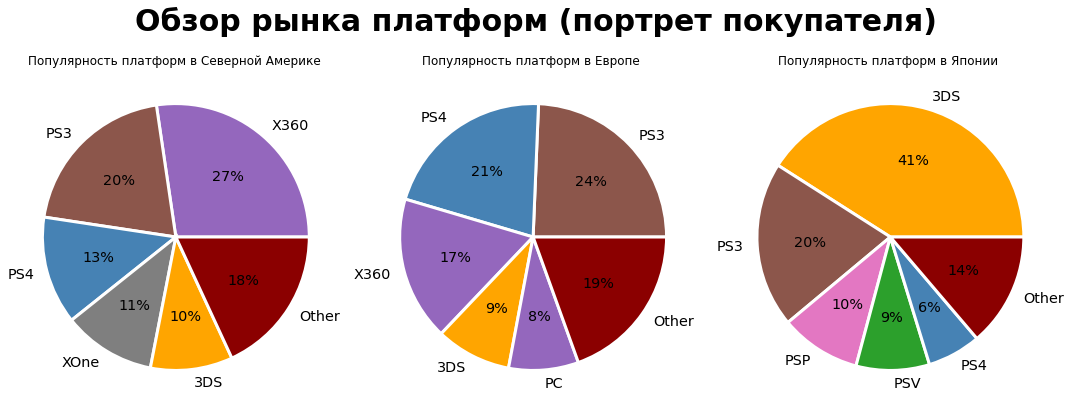

In [36]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2011

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

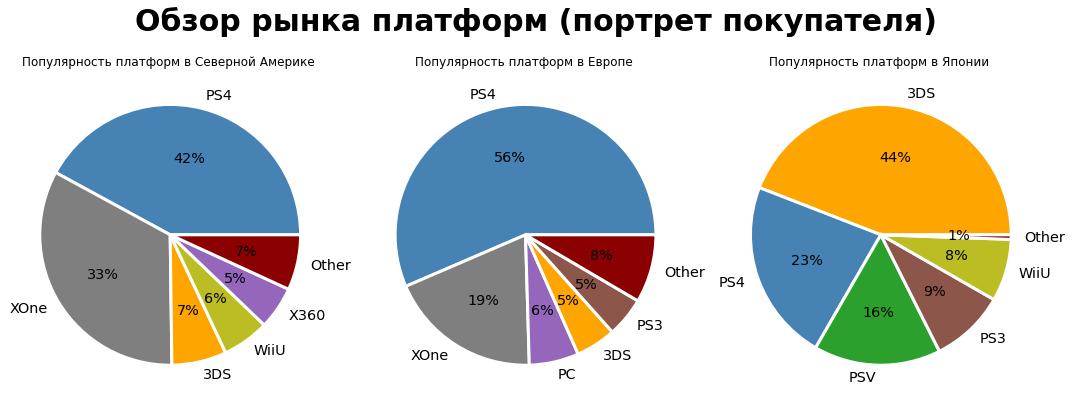

In [37]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])